In [2]:
#installation for pre-processing text
# pip install spacy

SyntaxError: invalid syntax (630199801.py, line 2)

In [ ]:
#installation for topic modeling visuals
pip install pyldavis

In [ ]:
#installation of gensim -- library for unsupervised topic modeling and LDA modeling
pip install --upgrade gensim

In [ ]:
#installation of regrex - syntax highlighting
pip install regrex

In [ ]:
#installation for corpus
pip install corpora

In [ ]:
#installation of natural language toolkit
pip install --user -U nltk

In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data
ncontrols = pd.read_csv('sp800-53.csv')

C:\Users\IvanaPerkins\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\IvanaPerkins\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
ncontrols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Control Identifier                     1189 non-null   object
 1   Control (or Control Enhancement) Name  1189 non-null   object
 2   Control Text                           1189 non-null   object
 3   Discussion                             1007 non-null   object
 4   Related Controls                       1007 non-null   object
dtypes: object(5)
memory usage: 46.6+ KB


In [3]:
#creating variable for cleaning the text - removing any quotations/punctations and making everything lower case
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    return text1.lower()
    #print('cleaned:'+text1)

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ivana
[nltk_data]     Perkins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
ncontrols['Control Text'] = ncontrols['Control Text'].apply(clean_text)

In [5]:
print(ncontrols['Control Text'])

0       a develop document and disseminate to assignme...
1       a define and document the types of accounts al...
2       support the management of system accounts usin...
3       automatically selection remove disable tempora...
4       disable accounts within assignment organizatio...
                              ...                        
1184    a develop and implement anticounterfeit policy...
1185    train assignment organizationdefined personnel...
1186    maintain configuration control over the follow...
1187    scan for counterfeit system components assignm...
1188    dispose of assignment organizationdefined data...
Name: Control Text, Length: 1189, dtype: object


In [6]:
#pre-processing text - removing 'stopwords'
#stopwords = the, a, an,in (for example) do not carry significant meaning 
#it is important to remove stopwords b/c they are not meaningful - makes it easier to focus on important text
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

ncontrols['Control Text'] = ncontrols['Control Text'].apply(remove_stopwords)
print(ncontrols['Control Text'])

0       develop document disseminate assignment organi...
1       define document types accounts allowed specifi...
2       support management system accounts using assig...
3       automatically selection remove disable tempora...
4       disable accounts within assignment organizatio...
                              ...                        
1184    develop implement anticounterfeit policy proce...
1185    train assignment organizationdefined personnel...
1186    maintain configuration control following syste...
1187    scan counterfeit system components assignment ...
1188    dispose assignment organizationdefined data do...
Name: Control Text, Length: 1189, dtype: object


In [7]:
#load spacy model
#lemma means root
#lemmatization is to reduce words to their original 'lemma' format so that they are easier to classify and 
#compare similar words
#for example = running, ran, run, runs
#finding similiar words for the nouns and adjectives
#create lemma for the nouns and adjectives

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [8]:
#terms are being tokenized
#tokenization is important for text classification
#tokenization divides strings/sentences into small 'tokens' (smaller chunks) to seperate out the words 
#from the string/sentence
terms = ncontrols['Control Text'].tolist()
print(terms[1])
tokenized = lemmatization(terms)
print(tokenized[1])

define document types accounts allowed specifically prohibited use within system
b assign account managers
c require assignment organizationdefined prerequisites criteria group role membership
d specify
1 authorized users system
2 group role membership and
3 access authorizations ie privileges assignment organizationdefined attributes required account
e require approvals assignment organizationdefined personnel roles requests create accounts
f create enable modify disable remove accounts accordance assignment organizationdefined policy procedures prerequisites criteria
g monitor use accounts
h notify account managers assignment organizationdefined personnel roles within
1 assignment organizationdefined time period accounts longer required
2 assignment organizationdefined time period users terminated transferred and
3 assignment organizationdefined time period system usage needtoknow changes individual
i authorize access system based on
1 valid access authorization
2 intended system usa

In [10]:
#create a dictionary
#create a document term matrix - this is a table of rows and colums that represents the text corpus
#every row is a document
#every column is a word that appears in the corpus
#the cells of the matrix count how many times each words appears in each document
#matrix is based on the dimension of the dictionary
dictionary = corpora.Dictionary(tokenized)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized]

In [11]:
#create LDA model using gensim library
#genism is a python library for unsupervised topic modeling
LDA = gensim.models.ldamodel.LdaModel

In [12]:
#building LDA model
#document matrix is what will be passing through
# chunksize determines the number of documents processed together in each iteration - 
#the bigger the chunksize the faster will speed up the training
#passes - controls how much we train the model on the corpus
#I chose to use 10 topics (number of topics can be underestimated and overestimated)
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [13]:
#printing topics
#topic are = information, system, assignment, access, assignment, assignment, external, code, assignment, system
#noticed that it has assignment and system multiple times, this is due to LDA being a mixed membership model
#a mixed membership model (each document is assumed to be a mixture of numerous topics)
#each topic is followed by terms with the probability of being a representative or important to the topic 
lda_model.print_topics()

[(0,
  '0.098*"information" + 0.058*"assignment" + 0.055*"identifiable" + 0.038*"communication" + 0.031*"mechanism" + 0.030*"element" + 0.025*"traffic" + 0.021*"system" + 0.020*"event" + 0.020*"individual"'),
 (1,
  '0.172*"system" + 0.104*"component" + 0.080*"assignment" + 0.042*"service" + 0.039*"supply" + 0.033*"chain" + 0.027*"control" + 0.018*"selection" + 0.016*"function" + 0.015*"physical"'),
 (2,
  '0.058*"assignment" + 0.052*"policy" + 0.036*"security" + 0.030*"privacy" + 0.028*"procedure" + 0.027*"management" + 0.021*"system" + 0.020*"frequency" + 0.019*"role" + 0.019*"organizational"'),
 (3,
  '0.082*"access" + 0.062*"assignment" + 0.034*"personnel" + 0.033*"activity" + 0.029*"information" + 0.028*"role" + 0.027*"audit" + 0.022*"maintenance" + 0.020*"authorization" + 0.017*"account"'),
 (4,
  '0.086*"assignment" + 0.040*"information" + 0.036*"system" + 0.034*"monitoring" + 0.025*"individual" + 0.024*"risk" + 0.022*"control" + 0.020*"organization" + 0.019*"organizational" + 0

In [14]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
#bubbles represent the topics - the bigger the bubble represents the frequencey of the topic in the csv file
pyLDAvis.enable_notebook()
visuals = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
visuals

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.160721  0.156588       1        1  22.030601
1     -0.105827 -0.185527       2        1  13.041988
8     -0.071204 -0.025668       3        1  11.795774
3     -0.000580  0.181722       4        1   9.937136
4     -0.102245  0.031503       5        1   9.764907
9     -0.110087 -0.155564       6        1   9.014333
5      0.054849 -0.044312       7        1   8.437060
7      0.073036  0.056017       8        1   6.589570
0      0.134472  0.048749       9        1   5.740880
6      0.288308 -0.063508      10        1   3.647751, topic_info=            Term        Freq       Total Category  logprob  loglift
74        system  906.000000  906.000000  Default  30.0000  30.0000
119    component  351.000000  351.000000  Default  29.0000  29.0000
0         access  131.000000  131.000000  Default  28.0000  28.0000
34        policy  183.000000  183.000000  Default  27.0000  27.0000
114  information  431.000000  431.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
207       device    7.016649   56.257308  Topic10  -4.4237   1.2294
74        system   10.480180  906.997459  Topic10  -4.0225  -1.1496
81          user    5.617994   66.045248  Topic10  -4.6461   0.8467
80           use    5.436828   66.632791  Topic10  -4.6788   0.8051
8        control    5.939779  152.184677  Topic10  -4.5904   0.0676

[565 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
106       8  0.783625            ac2
1231      3  0.917385     acceptance
0         4  0.989870         access
45        2  0.097298        account
45        4  0.875686        account
...     ...       ...            ...
506       6  0.722554  vulnerability
1064      4  0.826830        website
359       7  0.971321       wireless
705      10  0.794313           work
1424      3  0.897092   writeprotect

[787 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 9, 4, 5, 10, 6, 8, 1, 7])

In [15]:
#measures for hod good the model is

#perplexity is the measure of how well a model predicts the text
# for perplexity, the lower the score the better (means the model has learned important topics)
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  

#coherence is making sense of the words or meaningful connections (understanding)
#the higher the score the better
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.714672385480985

Coherence Score:  0.4019019118184238


In [16]:
#now that I have baseline coherence score - can compute coherence values


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [17]:
#compute the conherence values by passing through the dictionary and document matrix
#took awhile to run
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized, start=2, limit=50, step=1)

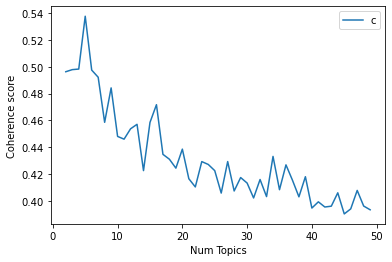

In [18]:
# present graph
#the less number of topics the greater the coherence score
#the more topics in a set the less understanding it will going to be
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [19]:
# Print the coherence scores
#number of topics equal to 2 had the greatest coherence value
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4963
Num Topics = 3  has Coherence Value of 0.4978
Num Topics = 4  has Coherence Value of 0.4983
Num Topics = 5  has Coherence Value of 0.5376
Num Topics = 6  has Coherence Value of 0.4975
Num Topics = 7  has Coherence Value of 0.4922
Num Topics = 8  has Coherence Value of 0.4586
Num Topics = 9  has Coherence Value of 0.4842
Num Topics = 10  has Coherence Value of 0.4481
Num Topics = 11  has Coherence Value of 0.4461
Num Topics = 12  has Coherence Value of 0.4538
Num Topics = 13  has Coherence Value of 0.4571
Num Topics = 14  has Coherence Value of 0.4227
Num Topics = 15  has Coherence Value of 0.4585
Num Topics = 16  has Coherence Value of 0.4717
Num Topics = 17  has Coherence Value of 0.4348
Num Topics = 18  has Coherence Value of 0.4312
Num Topics = 19  has Coherence Value of 0.4245
Num Topics = 20  has Coherence Value of 0.4387
Num Topics = 21  has Coherence Value of 0.4166
Num Topics = 22  has Coherence Value of 0.4106
Num Topics = 23  has 

In [20]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.086*"system" + 0.082*"assignment" + 0.032*"information" + 0.031*"component" + 0.022*"security" + 0.018*"control" + 0.012*"personnel" + 0.011*"individual" + 0.010*"service" + 0.010*"role"'),
 (1,
  '0.049*"assignment" + 0.029*"system" + 0.018*"information" + 0.018*"management" + 0.017*"security" + 0.015*"frequency" + 0.013*"service" + 0.013*"risk" + 0.012*"organizational" + 0.012*"configuration"'),
 (2,
  '0.069*"assignment" + 0.052*"system" + 0.027*"information" + 0.024*"component" + 0.017*"access" + 0.016*"event" + 0.016*"policy" + 0.015*"maintenance" + 0.014*"personnel" + 0.011*"mechanism"'),
 (3,
  '0.080*"assignment" + 0.037*"system" + 0.030*"information" + 0.017*"policy" + 0.012*"frequency" + 0.012*"role" + 0.011*"access" + 0.011*"personnel" + 0.011*"event" + 0.010*"identifiable"'),
 (4,
  '0.065*"assignment" + 0.037*"system" + 0.018*"information" + 0.018*"access" + 0.018*"change" + 0.013*"physical" + 0.013*"plan" + 0.012*"frequency" + 0.011*"individual" + 0.011*"organiz

In [21]:
# Visualize the topics with the optimal model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.007000  0.036467       1        1  21.701444
3     -0.036768 -0.069668       2        1  12.610216
4     -0.008784 -0.027248       3        1  11.462539
5      0.003046 -0.012700       4        1  10.626895
1      0.023265 -0.020895       5        1   9.928201
2     -0.072096 -0.030509       6        1   9.755034
8      0.007205  0.091781       7        1   9.279302
6      0.124415 -0.024039       8        1   8.539969
7     -0.033283  0.056812       9        1   6.096399, topic_info=          Term        Freq       Total Category  logprob  loglift
74      system  914.000000  914.000000  Default  30.0000  30.0000
165    privacy  164.000000  164.000000  Default  29.0000  29.0000
119  component  294.000000  294.000000  Default  28.0000  28.0000
124   security  272.000000  272.000000  Default  27.0000  27.0000
0       access  174.000000  174.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
45     account    4.814032   37.142001   Topic9  -5.3141   0.7543
286   activity    5.112168   47.577863   Topic9  -5.2540   0.5667
42   selection    5.933730  110.543764   Topic9  -5.1050  -0.1273
40        role    5.911533  139.882993   Topic9  -5.1087  -0.3664
33   personnel    5.692225  133.709199   Topic9  -5.1465  -0.3591

[717 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
106       8  0.738843           ac2
0         1  0.194686        access
0         2  0.131699        access
0         3  0.194686        access
0         4  0.045808        access
...     ...       ...           ...
359       6  0.130620      wireless
359       9  0.130620      wireless
1403      7  0.533938     writeable
1424      5  0.893167  writeprotect
1119      3  0.552796          year

[1643 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 6, 2, 3, 9, 7, 8])